# Atividade 01 - Inteligência Computacional
## Fabiano Dicheti

#### Aplicar um classificador na base de dados Iris normalizada, avaliando sua acurácia em conjuntos de treinamento e teste. 


### KNN - Implementado

#### Os modelos k-NN funcionam pegando um ponto de dados e observando os 'k' pontos de dados rotulados mais próximos. O ponto de dados recebe então o rótulo da maioria dos 'k' pontos mais próximos.

## Importando bibliotecas ##

In [151]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from collections import Counter


## Setup dos dados ##

In [152]:
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

## Escalando os dados ##

In [161]:
escalar = Normalizer()
escalar.fit(X)
X_escala = escalar.transform(X)

## Separando Treinamento e Teste ##

In [162]:
x_train, x_test, y_train, y_test= train_test_split(X_escala, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #evitar viez
                                                   random_state= 0)

In [163]:
print(f'tamanho conjunto de treino: {x_train.shape[0]} amostras \ntamanho conjunto de teste: {x_test.shape[0]} amostras')

tamanho conjunto de treino: 120 amostras 
tamanho conjunto de teste: 30 amostras


## Visualizando a Transformação dos Dados ##

Text(0.5, 1.08, 'Depois de Normalizar')

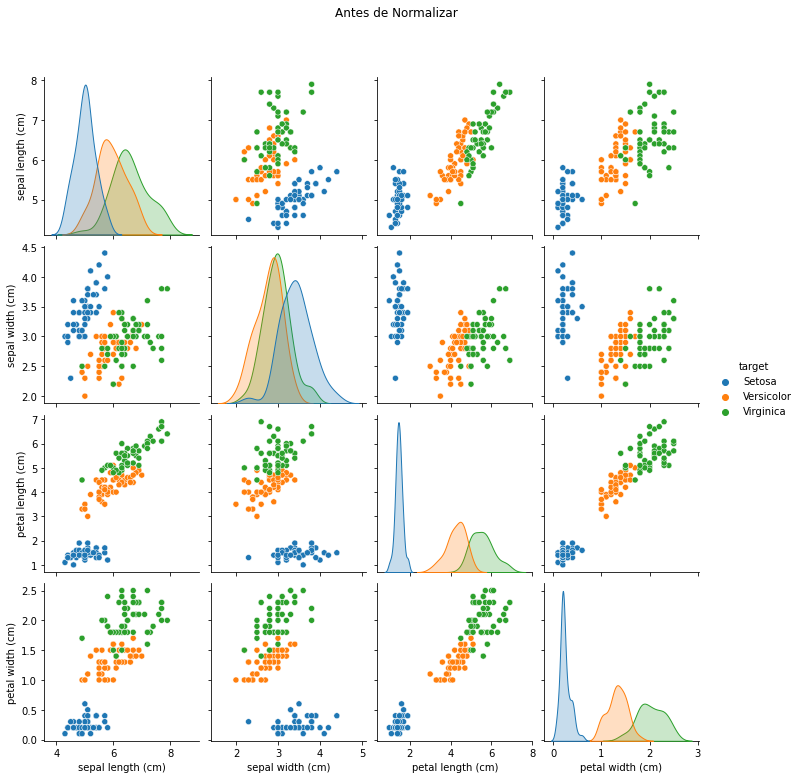

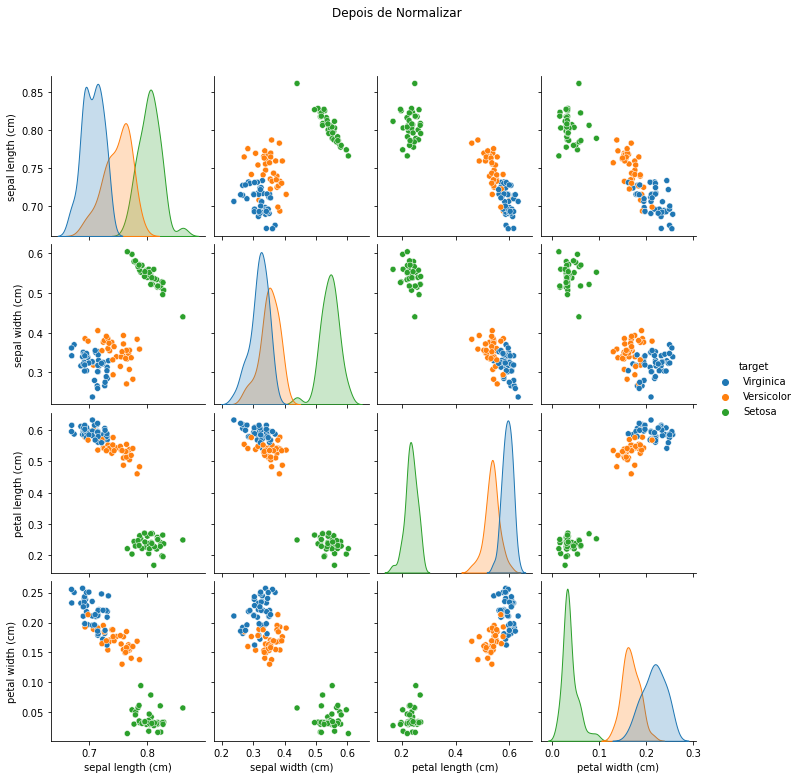

In [156]:
dicionario= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}

antes = sns.pairplot(iris_df.replace({'target': dicionario}), hue= 'target')
antes.fig.suptitle('Antes de Normalizar', y=1.08)

iris_df_2= pd.DataFrame(data= np.c_[x_train, y_train],
                        columns= iris['feature_names'] + ['target'])

dicionario= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}

depois = sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
depois.fig.suptitle('Depois de Normalizar', y=1.08)

##  Implementação 

In [157]:
def d_euclidiana(x_train, ponto_x_test):

  distancias = []
  for row in range(len(x_train)):
      ponto_atual = x_train[row]
      distancia_atual = 0

      for col in range(len(ponto_atual)):
          distancia_atual += (ponto_atual[col] - ponto_x_test[col]) **2
            
      distancia_atual = np.sqrt(distancia_atual)

      distancias.append(distancia_atual)

  distancias = pd.DataFrame(data=distancias, columns=['dist'])
  return distancias

In [158]:
def nearest_neighbors(distancia_ponto, K):

    df_nearest= distancia_ponto.sort_values(by=['dist'], axis=0)
    df_nearest= df_nearest[:K]
    
    return df_nearest

In [159]:
def escolhe(df_nearest, y_train):
    contador = Counter(y_train[df_nearest.index])
    y_pred= contador.most_common()[0][0]

    return y_pred

In [160]:
def KNN(x_train, y_train, x_test, K):

    y_pred=[]

    for x_test_point in x_test:
        distancia_ponto  = d_euclidiana(x_train, x_test_point)
        df_ponto_proximo = nearest_neighbors(distancia_ponto, K)
        y_pred_ponto = escolhe(df_ponto_proximo, y_train)
        y_pred.append(y_pred_ponto)

    return y_pred  

## Avaliação 

In [164]:
treino = KNN(x_train, y_train,x_train, K)

In [165]:
print(f'A Acurácia observada no Treino foi de: {accuracy_score(y_train, y_treino)}')
print('Matriz de Confusao Treino:')
confusion_matrix(y_train, y_treino)

A Acurácia observada no Treino foi de: 0.9833333333333333
Matriz de Confusao Treino:


array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  0, 44]])

In [148]:
K=3
y_pred = KNN(x_train, y_train,x_test, K)
print(y_pred)

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0]


In [149]:
print(f'A Acurácia observada no teste foi de: {accuracy_score(y_test, y_pred)}')
print('Matriz de Confusao Teste')
confusion_matrix(y_test, y_pred)

A Acurácia observada no teste foi de: 0.9666666666666667
Matriz de Confusao Teste


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])